In [1]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import nltk.stem as stm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Reviews_df=pd.read_excel('Reviews7.xls')

In [3]:
def nan_to_string(text):
    if type(text) != str:
        return ' '
    else:
        return text
Reviews_df['Clean Review Text'] = Reviews_df['Review Text'].apply(nan_to_string)
Reviews_df['Clean Review Tags'] = Reviews_df['Review Tags'].apply(nan_to_string)

Reviews_df['Clean Review Tags'] = Reviews_df['Clean Review Tags'].apply(lambda x: (" ".join(x.split())).lower() )

def text_plus_tags(row):
    return row['Clean Review Text'] + row['Clean Review Tags']
Reviews_df['Full Review'] = Reviews_df.apply(text_plus_tags, axis=1)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 5), stop_words='english',min_df=.03, max_df=.97, max_features=25000)#words and pairs of words
X = vectorizer.fit_transform(Reviews_df['Full Review'])
X_vec=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

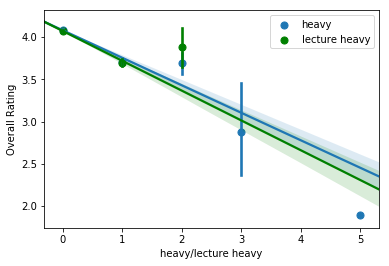

In [13]:
# diversity is important, being lecture heavy or too focused on one medium is bad
sns.regplot(x=X_vec['heavy'], y=Reviews_df['Overall Rating'], x_estimator=np.mean, label='heavy')
sns.regplot(x=X_vec['lecture heavy'], y=Reviews_df['Overall Rating'], x_estimator=np.mean, color='green', label='lecture heavy')
plt.legend();plt.xlabel('heavy/lecture heavy');

In [7]:
try:
    vectorizer.vocabulary_['handwriting']
except:
    print("handwriting is not important enough to mention, in < 3% of reviews")

handwriting is not important enough to mention, in < 3% of reviews
